In [9]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
import random
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D
from tensorflow.keras.layers import  Flatten, Dropout
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score

In [2]:
data_dir = "C:/Users/s/Desktop/Cropped For classification/Cropped For classification"
os.chdir(data_dir)
categories = os.listdir()
print(len(categories))
data = []
labels = []
for category in categories:
    path = os.path.join(data_dir, category)
    os.chdir(path)
    img_label = categories.index(category)
    for img in os.listdir():
        try:
            img_array = cv2.imread(img ,1)
            dim = (64,64)
            img_array = cv2.resize(img_array,dim,interpolation = cv2.INTER_AREA)
            data.append(img_array)
            labels.append(category)
        except Exception as e:
            pass

48


In [3]:
data = np.array(data)
labels = np.array(labels)
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

In [4]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(2610, 64, 64, 3) (653, 64, 64, 3) (2610,) (653,)


In [7]:
# 49 while data is only 48 classes, this is because categories start from 1 to 48
y_train = to_categorical(y_train, 49)
y_test = to_categorical(y_test, 49)

In [13]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
# We have 49 classes that's why we have defined 49 in the dense
model.add(Dense(49, activation='softmax'))

In [14]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [15]:
epochs = 20
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_split =0.3)

Epoch 1/20
58/58 [==============================] - 14s 237ms/step - loss: 6.7898 - accuracy: 0.1528 - val_loss: 3.0348 - val_accuracy: 0.3418
Epoch 2/20
58/58 [==============================] - 14s 239ms/step - loss: 2.5019 - accuracy: 0.4255 - val_loss: 1.8247 - val_accuracy: 0.6441
Epoch 3/20
58/58 [==============================] - 14s 241ms/step - loss: 1.6644 - accuracy: 0.6008 - val_loss: 1.3211 - val_accuracy: 0.7832
Epoch 4/20
58/58 [==============================] - 14s 241ms/step - loss: 1.2720 - accuracy: 0.6999 - val_loss: 1.0752 - val_accuracy: 0.8176
Epoch 5/20
58/58 [==============================] - 14s 243ms/step - loss: 0.8643 - accuracy: 0.7864 - val_loss: 0.8157 - val_accuracy: 0.8431
Epoch 6/20
58/58 [==============================] - 14s 239ms/step - loss: 0.8180 - accuracy: 0.7903 - val_loss: 0.7960 - val_accuracy: 0.8418
Epoch 7/20
58/58 [==============================] - 14s 242ms/step - loss: 0.6458 - accuracy: 0.8319 - val_loss: 0.9120 - val_accuracy: 0.8495

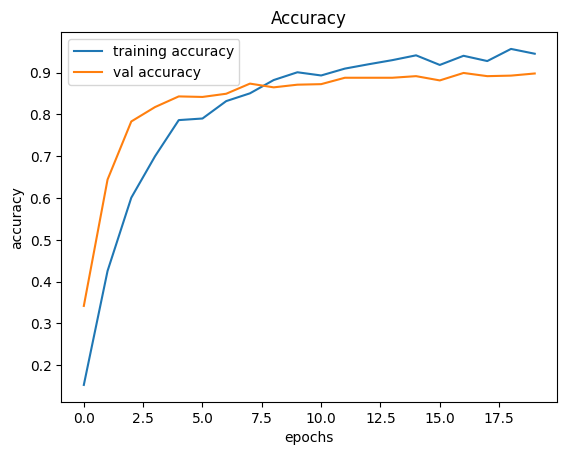

In [16]:
# Plot the accuracy 

plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

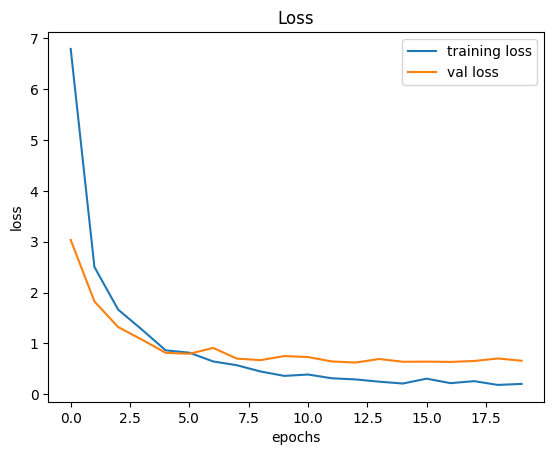

In [17]:
# Plot the Loss

plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [20]:
model.evaluate(X_test, y_test)

21/21 [==============================] - 1s 35ms/step - loss: 0.7108 - accuracy: 0.8714


[0.7108420729637146, 0.8713629245758057]

In [19]:
model.save("C:/Users/s/Desktop/Cropped For classification/egyptian_model.h5")